In [3]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X=np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2] ])
nbrs=NearestNeighbors(n_neighbors=3,algorithm='ball_tree').fit(X)
distances,indices = nbrs.kneighbors(X)
print(distances,indices)

[[0.         1.         2.23606798]
 [0.         1.         1.41421356]
 [0.         1.41421356 2.23606798]
 [0.         1.         2.23606798]
 [0.         1.         1.41421356]
 [0.         1.41421356 2.23606798]] [[0 1 2]
 [1 0 2]
 [2 1 0]
 [3 4 5]
 [4 3 5]
 [5 4 3]]


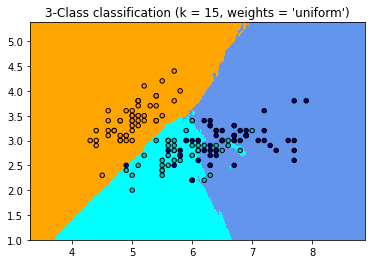

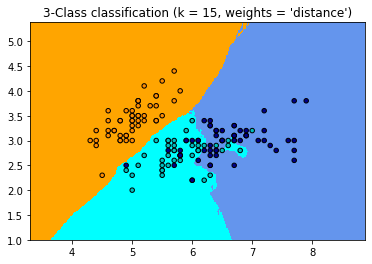

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# 导入需要处理的数据
iris = datasets.load_iris()

# 我们仅采用前两个特征。我们可以通过使用二维数据集来避免使用复杂的切片
X = iris.data[:, :2]
y = iris.target

h = .02  # 设置网格中的步长

# 提取色谱
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # 我们创建最近邻分类器的实例并拟合数据。
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # 绘制决策边界。 为此，我们将为网格[x_min，x_max] x [y_min，y_max]中的每个点分配颜色。
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 将结果放入颜色图
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 绘制训练数据
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [6]:
#nca+knn
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.7,random_state=42)
nca=NeighborhoodComponentsAnalysis(random_state=42)
knn=KNeighborsClassifier(n_neighbors=3)
nca_pipe=Pipeline([('nca',nca),('knn',knn)])
nca_pipe.fit(X_train,y_train)
print(nca_pipe.score(X_test,y_test))

0.9619047619047619
